In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
data = 'kaggle_laptops.csv'
df = pd.read_csv(data,encoding='ISO-8859-1')

In [48]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [49]:
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [50]:
#Normalize the columns to remove space and put an  underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [51]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [52]:
df.dtypes



laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [53]:
df.gpu.head()

0         NaN
1         NaN
2         NaN
3    RTX 3050
4         NaN
Name: gpu, dtype: object

In [54]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [55]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")


In [56]:
df.shape
orig_df = df.copy()

In [57]:
 #use only the following columns:

#'ram',
#'storage',
#'screen',
#'final_price'

my_df = df[['ram','storage','screen','final_price']]

In [58]:
#shape of data
my_df.shape

(2160, 4)

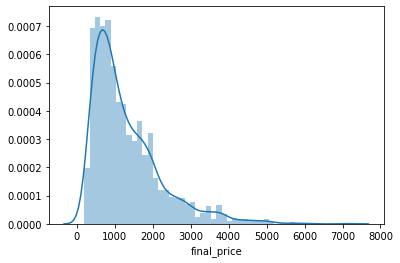

In [59]:
#Look at the final_price variable. Does it have a long tail?
sns.distplot(my_df['final_price'], bins=50)

In [60]:
#Question 1
#There's one column with missing values. What is it?
my_df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [61]:
#Question 2
#What's the median (50% percentile) for variable 'ram'?
my_df.ram.median()

16.0

In [62]:
#Prepare and split the dataset
#Shuffle the dataset (the filtered one you created above), use seed 42.
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
#Use the same code as in the lectures

In [63]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(my_df)
n_val = int(n *.20)
n_test = int(n *.20)
n_train = n -(n_val+n_test)
n_train, n_val, n_test


(1296, 432, 432)

In [64]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = my_df.iloc[idx]

df_train = df_shuffled.iloc[idx[:n_train]].copy()
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df_shuffled.iloc[idx[n_train+n_val:]].copy()

In [65]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [66]:
df_train = df_train.reset_index(drop=True) 
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
#seperate the target variable and do not use the log transform since the tail is not very long.
#y_train = np.log1p(df_train.final_price.values)
y_train = (df_train.final_price.values)
#y_val =  np.log1p(df_val.final_price.values)
y_val =  (df_val.final_price.values)
#y_test = np.log1p(df_test.final_price.values)
y_test = (df_test.final_price.values)

In [68]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [69]:
#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.
#Try both options. For each, train a linear regression model without regularization using the code from the lessons.
#For computing the mean, use the training only!
#Use the validation dataset to evaluate the models and compare the RMSE of each option.
#Round the RMSE scores to 2 decimal digits using round(score, 2)
#Which option gives better RMSE?
df_train.dtypes

ram          int64
storage      int64
screen     float64
dtype: object

In [70]:
#Linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [71]:
#fill na with 0 
#df_train.isnull().sum()
X_train = df_train.fillna(0).values
#train the model on the training data
w_0, w = train_linear_regression(X_train, y_train)
# Use the validation dataset to evaluate the model and compute RMSE
X_val = df_val.fillna(0).values
y_pred = w_0 + X_val.dot(w)

In [72]:

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse),2)



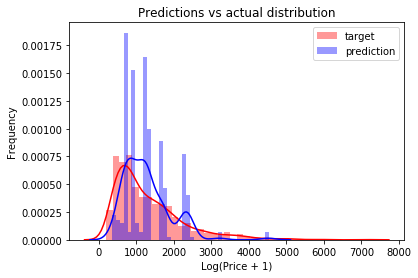

In [73]:
plt.figure(figsize=(6, 4))

sns.distplot(y_train, label='target', color='red', bins=40)
sns.distplot(y_pred, label='prediction', color='blue', bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()



In [74]:
#rmse when nan was filled with 0
rmse(y_val, y_pred)

564.14

In [75]:
#fill na with mean
X_train = df_train.fillna(df.mean()).values
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

564.27

In [76]:
#Which option gives better RMSE? --filling with 0 gives a slightly better answer at 564.14

In [77]:
#Question 4
#Now let's train a regularized linear regression.
#For this question, fill the NAs with 0.
#Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
#Use RMSE to evaluate the model on the validation dataset.
#Round the RMSE scores to 2 decimal digits.
#Which r gives the best RMSE?

In [78]:
#regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])  
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]  


In [79]:
##For this question, fill the NAs with 0.
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)

In [80]:
#Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_val = w_0 + X_val.dot(w)
    rmse_value = rmse(y_val, y_pred_val)
    
    print('%5s, %.2f, %.2f' % (r, w_0, rmse_value))

    0, 596.63, 564.14
 0.01, 595.92, 564.15
  0.1, 589.66, 564.18
    1, 533.62, 564.49
    5, 375.23, 565.63
   10, 273.77, 566.56
  100, 47.15, 569.20


In [81]:
#Use RMSE to evaluate the model on the validation dataset.
#Round the RMSE scores to 2 decimal digits.
#Which r gives the best RMSE?
X_val = df_val.fillna(0).values

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_val = w_0 + X_val.dot(w)
    rmse_value = rmse(y_pred_val, y_val)
    
    print('%5s, %.2f, %.2f' % (r, w_0, rmse_value))



    0, 596.63, 564.14
 0.01, 595.92, 564.15
  0.1, 589.66, 564.18
    1, 533.62, 564.49
    5, 375.23, 565.63
   10, 273.77, 566.56
  100, 47.15, 569.20


Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [82]:
rmse_list = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    df = orig_df.copy()
    base = ['ram','storage','screen','final_price']
    my_df = df[base]
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_shuffled = my_df.iloc[idx]
    
    df_train = df_shuffled.iloc[idx[:n_train]].copy()
    df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df_shuffled.iloc[idx[n_train+n_val:]].copy()
    
    df_train = df_train.reset_index(drop=True) 
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = df_train.fillna(0).values
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = df_val.fillna(0).values
    y_pred = w_0 + X_val.dot(w)
    rmse_value = rmse(y_val, y_pred)
    rmse_list.append(rmse_value)
   
    
    print('%2d, %.2f, %.4f' % (s, w_0, rmse_value))
  


 0, 940.95, 895.8500
 1, 1141.15, 894.6500
 2, 1109.26, 895.6000
 3, 661.39, 892.1700
 4, 833.88, 895.4800
 5, 800.11, 898.9500
 6, 1207.56, 896.4400
 7, 1054.45, 895.8700
 8, 1191.00, 894.1100
 9, 1188.75, 894.6500


In [92]:
np.round(np.std(rmse_list),3)

1.654

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [85]:
df.head(10)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
5,msi_crosshair_17_c12vf-264xes_intel_core_i7-12...,new,msi,crosshair,intel_core_i7,32,1000,ssd,rtx_4060,17.3,no,1699.00
6,lenovo_thinkpad_e14_gen_4_amd_ryzen_5_5625u/8g...,new,lenovo,thinkpad,amd_ryzen_5,8,256,ssd,NaN,14.0,no,909.00
7,asus_vivobook_15_f515ja-ej2882w_intel_core_i7-...,new,asus,vivobook,intel_core_i7,8,512,ssd,NaN,15.6,no,809.01
8,medion_akoya_e15415_intel_core_i5-10210u/8gb/2...,new,medion,akoya,intel_core_i5,8,256,ssd,NaN,15.6,no,519.00
9,hp_victus_16-d1038ns_intel_core_i7-12700h/16gb...,new,hp,victus,intel_core_i7,16,512,ssd,rtx_3050,16.1,no,1149.00


In [86]:
df = orig_df.copy()
base = ['ram','storage','screen','final_price']
my_df = df[base]

n = len(my_df)
n_combined = int(n *.80)
n_test = int(n *.20)
#n_train = n -(n_val+n_test)
n_combined, n_test

(1728, 432)

In [87]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = my_df.iloc[idx]

df_combined = df_shuffled.iloc[idx[:n_combined]]
df_test = df_shuffled.iloc[idx[n_combined:]]

df_combined = df_combined.reset_index(drop=True) 
df_test = df_test.reset_index(drop=True)


X_combined = df_combined.fillna(0).values
y_combined =  df_combined.final_price.values


X_test = df_test.fillna(0).values
y_test = df_test.final_price.values

del df_combined['final_price']
del df_test['final_price']




In [88]:
w_0, w = train_linear_regression_reg(X_combined, y_combined, r=0.001)

In [89]:

y_pred_test = w_0 + X_test.dot(w)

In [90]:
rmse(y_test, y_pred_test)

0.0

In [91]:
orig_df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99
